In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ENB2012_data.csv')

In [21]:
data.columns = ["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]

In [22]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [47]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        #Q1 

        Q1 = np.percentile(df,25)

        #Q3 

        Q3 = np.percentile(df,75)


        #IQR

        IQR = Q3 - Q1

        #OUTLIER STEP

        outlier_step = IQR*1.5

        #FINDING STEPP


        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        #store indeces

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)

    multiple_outliers = list(i for i,v in outlier_indices.items() if v>1)

    return multiple_outliers

In [48]:
detect_outliers(data,["Heating Load"])

[]

In [49]:
detect_outliers(data,["Cooling Load"])

[]

# Scalling

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col = ["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]
data[col] = scaler.fit_transform(data[col])
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670116,-0.342666
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670116,-0.342666
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670116,-0.342666
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670116,-0.342666
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366


# Test/Train Ayrımı

In [65]:
x = data.iloc[:,:7].values
y = data.iloc[:,-2:].values


In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [70]:
x_train.shape

(514, 7)

In [71]:
x_test.shape

(254, 7)

# Veri için uygun modelin seçilmesi:

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [75]:
models = {'LR' : LinearRegression(), 
          'DT' : DecisionTreeRegressor(), 
          'RF' : RandomForestRegressor(), 
          'XGB' : XGBRegressor(), 
          'KNN' : KNeighborsRegressor()}

In [76]:
for name, model in models.items():
    print(name)
    print("-"*10)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print("Train Score",r2_score(y_train,model.predict(x_train)))
    print("Validation Score",r2_score(y_test,y_pred))
    print("="*50)

LR
----------
Train Score 0.9078739988714276
Validation Score 0.8883287355363896
DT
----------
Train Score 0.9892152881305916
Validation Score 0.9715848380270349
RF
----------
Train Score 0.9887860692272972
Validation Score 0.9738267378103345
XGB
----------
Train Score 0.9891989250968991
Validation Score 0.9728302817841682
KNN
----------
Train Score 0.9521540753701603
Validation Score 0.9049551347640234


#  Model Oluşturmak

In [77]:
model = RandomForestRegressor()

model.fit(x_train,y_train)

print("Train Score:",r2_score(y_train,model.predict(x_train)))
print("Validation Score:",r2_score(y_test,model.predict(x_test)))

Train Score: 0.9888215013349396
Validation Score: 0.9740392799227158


In [78]:
y_pred = model.predict(x_test)

In [80]:
y_pred.shape

(254, 2)

In [81]:
y_test.shape

(254, 2)

In [83]:
predict = pd.DataFrame(y_pred)

In [84]:
trueValues = pd.DataFrame(y_test)

In [85]:
concat = pd.concat([trueValues,predict],axis = 1)

In [87]:
concat.columns = ["True Heating Load","True Cooling Load","Predict Heating Load","Predict Cooling Load"]

In [88]:
concat

,True Heating Load,True Cooling Load,Predict Heating Load,Predict Cooling Load
0,1.737748,1.269812,1.750102,1.434260
1,-0.811930,-0.837033,-0.771942,-0.856361
2,-0.690942,-0.554086,-0.702351,-0.552580
3,1.033636,0.991073,1.023200,0.964212
4,-0.683008,-0.551983,-0.702351,-0.552580
...,...,...,...,...
249,0.982067,0.964777,0.998588,0.927615
250,-0.948786,-1.116823,-0.921617,-1.069547
251,0.160934,0.506173,0.278828,0.651906
252,0.725215,0.577698,0.657672,0.640599


In [89]:
concat.corr()

,True Heating Load,True Cooling Load,Predict Heating Load,Predict Cooling Load
True Heating Load,1.000000,0.977864,0.998476,0.988748
True Cooling Load,0.977864,1.000000,0.981886,0.975426
Predict Heating Load,0.998476,0.981886,1.000000,0.988580
Predict Cooling Load,0.988748,0.975426,0.988580,1.000000


Text(0, 0.5, 'Predict Heating Load')

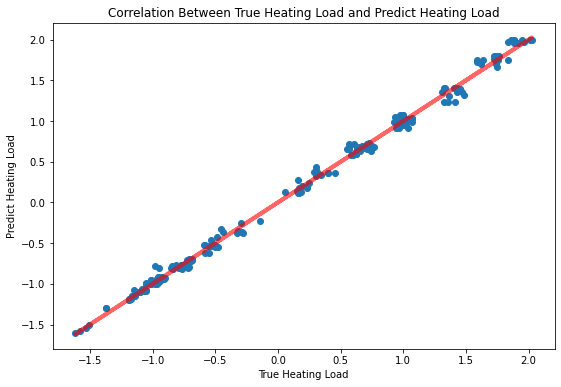

In [118]:
plt.figure(figsize=(9,6))
plt.scatter(concat["True Heating Load"],concat["Predict Heating Load"])
plt.plot(concat["True Heating Load"],concat["True Heating Load"],color = "red",linewidth = 4,alpha = 0.6)
plt.title("Correlation Between True Heating Load and Predict Heating Load")
plt.xlabel("True Heating Load")
plt.ylabel("Predict Heating Load")

Text(0, 0.5, 'Predict Cooling Load')

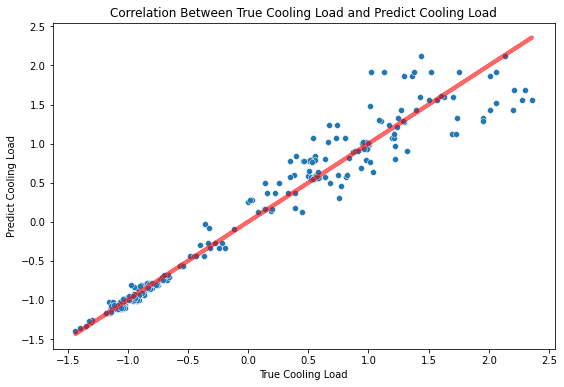

In [117]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = concat["True Cooling Load"],y = concat["Predict Cooling Load"])
plt.plot(concat["True Cooling Load"],concat["True Cooling Load"],color = "red",linewidth = 4,alpha = 0.6)
plt.title("Correlation Between True Cooling Load and Predict Cooling Load")
plt.xlabel("True Cooling Load")
plt.ylabel("Predict Cooling Load")

# StatsModel

In [163]:
import statsmodels.api as sm
X_list = data.iloc[:,[0,1,2,3,4,6,7]].values
values = data.iloc[:,-2:-1]
model = sm.OLS(values,X_list).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              1388.
Date:                Mon, 30 May 2022   Prob (F-statistic):                        0.00
Time:                        19:44:10   Log-Likelihood:                         -137.71
No. Observations:                 768   AIC:                                      287.4
Df Residuals:                     762   BIC:                                      315.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6790      0.108     -6.303      0.000      -0.891      -0.468
x2            -0.3736      0.079     -4.702      0.000      -0.530      -0.218
x3             0.0705      0.021      3.377      0.001       0.030       0.112
x4            -0.3984      0.071     -5.578      0.000      -0.539      -0.258
x5             0.7237      0.059     12.353      0.000       0.609       0.839
x6             0.2632      0.011     24.519      0.000       0.242       0.284
x7             0.0313      0.011      2.918      0.004       0.010       0.052
==============================================================================
Omnibus:                       18.654   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.740
Skew:                           0.044   Prob(JB):                     6.38e-09
Kurtosis:                       4.082   Cond. No.                     4.79e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [169]:
import statsmodels.api as sm
X_list = data.iloc[:,[0,1,2,3,4,6,7]].values
values = data.iloc[:,-1]
model = sm.OLS(values,X_list).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Cooling Load   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              1003.
Date:                Mon, 30 May 2022   Prob (F-statistic):                        0.00
Time:                        19:45:16   Log-Likelihood:                         -250.44
No. Observations:                 768   AIC:                                      512.9
Df Residuals:                     762   BIC:                                      540.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7871      0.125     -6.309      0.000      -1.032      -0.542
x2            -0.4172      0.092     -4.533      0.000      -0.598      -0.237
x3             0.0068      0.024      0.283      0.777      -0.041       0.054
x4            -0.4101      0.083     -4.959      0.000      -0.572      -0.248
x5             0.7885      0.068     11.623      0.000       0.655       0.922
x6             0.2061      0.012     16.580      0.000       0.182       0.230
x7             0.0066      0.012      0.534      0.594      -0.018       0.031
==============================================================================
Omnibus:                      105.093   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.005
Skew:                           0.769   Prob(JB):                     4.18e-51
Kurtosis:                       5.211   Cond. No.                     4.79e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

İki tarafta da x6 i çıkarınca yani 5. columnu çıkarınca R^2 değeri artıyor Bunu tablodaki R-squared (uncentered) kısmında görebilirsiniz. Tabii ben x6'ları attığım için değişimi göremiyorsunuz. x6'yı görmek için X_list içerisindeki data listesine 5'i ekleyip deneyebilirsiniz.

In [171]:
newData = data.drop("Orientation",axis = 1)

In [172]:
newData

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447,-1.814575,-0.670116,-0.342666
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447,-1.814575,-0.670116,-0.342666
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447,-1.814575,-0.670116,-0.342666
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447,-1.814575,-0.670116,-0.342666
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.760447,-1.814575,-0.145503,0.388366
...,...,...,...,...,...,...,...,...,...
763,-1.174613,1.275625,0.561951,0.972512,-1.0,1.244049,1.411336,-0.439049,-0.335303
764,-1.363812,1.553943,1.123903,0.972512,-1.0,1.244049,1.411336,-0.571937,-0.810736
765,-1.363812,1.553943,1.123903,0.972512,-1.0,1.244049,1.411336,-0.581854,-0.786544
766,-1.363812,1.553943,1.123903,0.972512,-1.0,1.244049,1.411336,-0.577887,-0.839136


# Yeni model için x ve y değerlerinin belirlenmesi: 

In [184]:
X = newData.iloc[:,:7].values
Y = newData.iloc[:,-2:].values

# Yeni x_train/x_test değerlerinin atanması

In [185]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33)

# En iyi modelin bulunması:

In [186]:
models = {'LR' : LinearRegression(), 
          'DT' : DecisionTreeRegressor(), 
          'RF' : RandomForestRegressor(), 
          'XGB' : XGBRegressor(), 
          'KNN' : KNeighborsRegressor()}

In [187]:
for name, model in models.items():
    print(name)
    print("-"*10)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print("Train Score",r2_score(y_train,model.predict(x_train)))
    print("Validation Score",r2_score(y_test,y_pred))
    print("="*50)

LR
----------
Train Score 0.9042855818011815
Validation Score 0.8959597479722844
DT
----------
Train Score 0.989252464072859
Validation Score 0.9676654336015897
RF
----------
Train Score 0.9889846030136697
Validation Score 0.9728562524166124
XGB
----------
Train Score 0.9892210433908284
Validation Score 0.9687844035605873
KNN
----------
Train Score 0.9832628301584945
Validation Score 0.9616995072223735


In [189]:
model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [192]:
y_pred = model.predict(x_test)

In [193]:
predict2 = pd.DataFrame(y_pred)

In [194]:
TrueValue = pd.DataFrame(y_test)

In [201]:
concat2 = pd.concat([TrueValue,predict2],axis = 1)
concat2.columns = ["True Heating Load","True Cooling Load","Predict Heating Load","Predict Cooling Load"]
concat2.head()

,True Heating Load,True Cooling Load,Predict Heating Load,Predict Cooling Load
0,0.121266,0.286337,0.105365,0.154884
1,-1.110434,-1.065283,-1.102826,-1.070340
2,-0.694909,-0.667686,-0.706280,-0.686326
3,1.088180,1.001591,1.008479,1.004084
4,1.404535,1.545395,1.437178,1.221591


In [202]:
concat2.corr()

,True Heating Load,True Cooling Load,Predict Heating Load,Predict Cooling Load
True Heating Load,1.000000,0.975191,0.998801,0.993190
True Cooling Load,0.975191,1.000000,0.980712,0.976268
Predict Heating Load,0.998801,0.980712,1.000000,0.991847
Predict Cooling Load,0.993190,0.976268,0.991847,1.000000


Text(0, 0.5, 'Predict Heating Load')

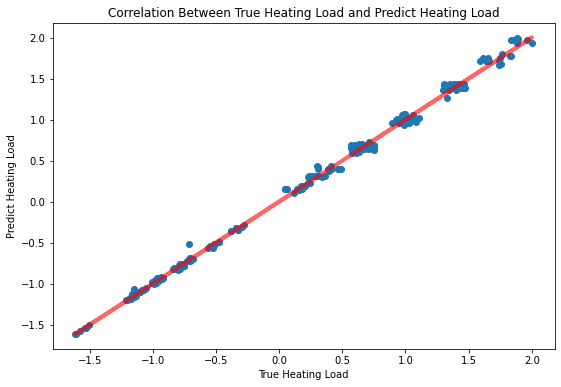

In [203]:
plt.figure(figsize=(9,6))
plt.scatter(concat2["True Heating Load"],concat2["Predict Heating Load"])
plt.plot(concat2["True Heating Load"],concat2["True Heating Load"],color = "red",linewidth = 4,alpha = 0.6)
plt.title("Correlation Between True Heating Load and Predict Heating Load")
plt.xlabel("True Heating Load")
plt.ylabel("Predict Heating Load")

Text(0, 0.5, 'Predict Cooling Load')

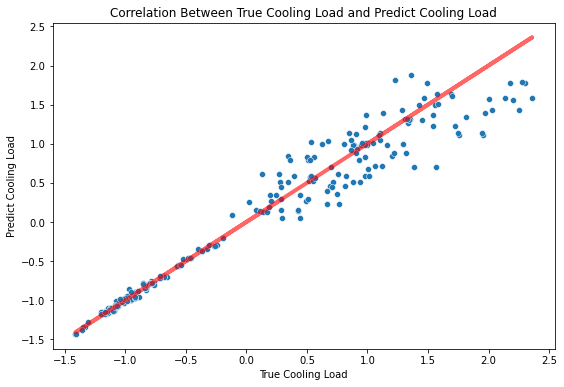

In [205]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = concat2["True Cooling Load"],y = concat2["Predict Cooling Load"])
plt.plot(concat2["True Cooling Load"],concat2["True Cooling Load"],color = "red",linewidth = 4,alpha = 0.6)
plt.title("Correlation Between True Cooling Load and Predict Cooling Load")
plt.xlabel("True Cooling Load")
plt.ylabel("Predict Cooling Load")